In [1]:
import pandas as pd
import numpy as np
# 加上这一句，能在jupyter notebook展示matplot图表
%matplotlib inline

df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})


In [2]:
df 

,A,B,C,D
0,foo,one,-1.939311,-1.339026
1,bar,one,1.361225,-1.462981
2,foo,two,2.852592,0.294102
3,bar,three,0.741151,1.800372
4,foo,two,0.352227,-0.358409
5,bar,two,-1.562961,-0.244364
6,foo,one,-2.031785,1.562035
7,foo,three,0.147645,0.357942


In [3]:
df.groupby('A').sum()


,C,D
A,,
bar,0.539416,0.093028
foo,-0.618632,0.516644


In [4]:
df.groupby(['A','B']).mean()


C         D
A   B                        
bar one    1.361225 -1.462981
    three  0.741151  1.800372
    two   -1.562961 -0.244364
foo one   -1.985548  0.111504
    three  0.147645  0.357942
    two    1.602409 -0.032153

In [5]:
df.groupby(['A','B'], as_index=False).mean() #这会使得A、B两列不会成为二级索引


,A,B,C,D
0,bar,one,1.361225,-1.462981
1,bar,three,0.741151,1.800372
2,bar,two,-1.562961,-0.244364
3,foo,one,-1.985548,0.111504
4,foo,three,0.147645,0.357942
5,foo,two,1.602409,-0.032153


In [6]:
df.groupby('A').agg([np.sum, np.mean, np.std])#列变成了多级索引


C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  0.539416  0.179805  1.540794  0.093028  0.031009  1.649012
foo -0.618632 -0.123726  2.005971  0.516644  0.103329  1.063324

In [7]:
# 方法1：预过滤，性能更好
df.groupby('A')['C'].agg([np.sum, np.mean, np.std])

# 方法2
df.groupby('A').agg([np.sum, np.mean, np.std])['C']


,sum,mean,std
A,,,
bar,0.539416,0.179805,1.540794
foo,-0.618632,-0.123726,2.005971


In [8]:
df.groupby('A').agg({"C":np.sum, "D":np.mean})


,C,D
A,,
bar,0.539416,0.031009
foo,-0.618632,0.103329


In [9]:
g = df.groupby('A')

for name,group in g:
    print(name)
    print(group)


bar
     A      B         C         D
1  bar    one  1.361225 -1.462981
3  bar  three  0.741151  1.800372
5  bar    two -1.562961 -0.244364
foo
     A      B         C         D
0  foo    one -1.939311 -1.339026
2  foo    two  2.852592  0.294102
4  foo    two  0.352227 -0.358409
6  foo    one -2.031785  1.562035
7  foo  three  0.147645  0.357942


In [10]:
g.get_group('bar')


,A,B,C,D
1,bar,one,1.361225,-1.462981
3,bar,three,0.741151,1.800372
5,bar,two,-1.562961,-0.244364


In [11]:
g = df.groupby(['A', 'B'])
for name,group in g:
    print(name)
    print(group)
    print()


('bar', 'one')
     A    B         C         D
1  bar  one  1.361225 -1.462981

('bar', 'three')
     A      B         C         D
3  bar  three  0.741151  1.800372

('bar', 'two')
     A    B         C         D
5  bar  two -1.562961 -0.244364

('foo', 'one')
     A    B         C         D
0  foo  one -1.939311 -1.339026
6  foo  one -2.031785  1.562035

('foo', 'three')
     A      B         C         D
7  foo  three  0.147645  0.357942

('foo', 'two')
     A    B         C         D
2  foo  two  2.852592  0.294102
4  foo  two  0.352227 -0.358409



In [15]:
# 分情况。如果是老师给你布置的习题，意图应该是要让你写判断闰年的函数。

def is_leap_year(year): # 判断闰年，是则返回True，否则返回False

    if (year % 4 == 0 and year % 100 != 0) or year % 400 == 0:

        return True

    else:

        return False
    
def function1(year, month, day): # 计算给定日期是那一年的第几天

    leap_year = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    no_leap_year = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    if is_leap_year(year):

        result = sum(leap_year[:month - 1]) + day

    else:

        result = sum(no_leap_year[:month - 1]) + day

    return result

if __name__=="__main__":
    print(is_leap_year(2012))
    print(function1(2012,3,21))

True
21


In [18]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import math

os.chdir(r'd:/test1')
#avoid font problem
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#read data
data = []
#order of magnitude
oom = 0
fin = open('./data.txt', 'r')
for i in fin.readlines():
    if i[0] == '#':
        #line start with # is comment
        pass
    elif i[0] == 'e':
        oom += int(i.split()[1])
    else:
        data.append(np.array([float(x) * pow(10, oom) for x in i.split()]))
        oom = 0
# print(data)
### main processing ###
print(oom)

<IPython.core.display.Javascript object>

0


In [25]:
fin = open('./data.txt', 'r', encoding='gbk')
pos = fin.readlines()
N = fin.readlines()
Al_num = fin.readlines()
Cnt = fin.readlines()
print(Cnt)
fin.close()

[]


In [26]:
def climbStairs1(n):
    # 递推法
    a = 1  # 上一个台阶只有一种方法
    b = 2  # 上两个台阶有两种方法
    c = 4  # 上三个台阶有四种方法
    for i in range(n - 3):
        c, b, a = a + b + c, c, b
    return c

def climbStairs2(n):
    # 递归法
    first3 = {1:1,2:2,3:4}
    if n in first3.keys():
        return first3[n]
    else:
        return climbStairs2(n-1)+climbStairs2(n-2)+climbStairs2(n-3)

print(climbStairs1(15))
print(climbStairs2(15))

5768
5768


### Series 和 Datetime索引

In [29]:
# 32.创建Series s，将2015所有工作日作为随机值的索引

dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
# s = pd.Series(np.random.rand(len(dti)), index=dti)

# s
dti

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [31]:
# 33.所有礼拜三的值求和
s[s.index.weekday == 2].sum() 
# 34.求每个自然月的平均数
s.resample('M').mean()

2015-01-31    0.411503
2015-02-28    0.555776
2015-03-31    0.457393
2015-04-30    0.556037
2015-05-31    0.425047
2015-06-30    0.545543
2015-07-31    0.474482
2015-08-31    0.488270
2015-09-30    0.411152
2015-10-31    0.569958
2015-11-30    0.421188
2015-12-31    0.437520
Freq: M, dtype: float64

## 数据清洗

In [33]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [34]:
# 37.FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数

df['FlightNumber']=df['FlightNumber'].interpolate().astype(int)

In [35]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [36]:
# 38.将From_To列从_分开，分成From, To两列，并删除原始列

temp=df.From_To.str.split('_',expand=True)
temp.columns=['From','To']
df=df.join(temp)
df=df.drop('From_To',axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


In [40]:
# 39.将From, To大小写统一

df['From']=df['From'].str.capitalize()
df['To']=df['To'].str.capitalize()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [42]:
# 40.Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'

df['Airline']=df['Airline'].str.extract('([a-zA-Z\s]+)',expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [48]:
 # 41.Airline列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。
    
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)

df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [49]:
# 可视化
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.style.use('ggplot')


<AxesSubplot:xlabel='xs', ylabel='ys'>

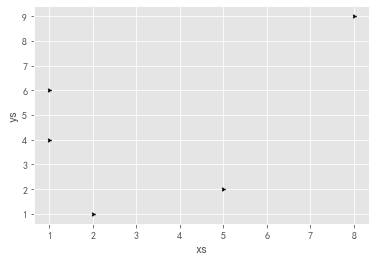

In [52]:
# 48.画出df的散点图
df.plot.scatter("xs", "ys", color = "black", marker = "4")

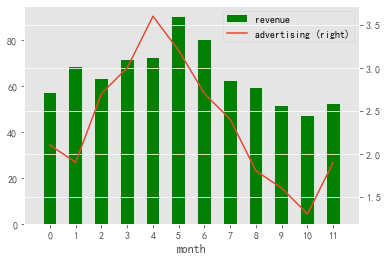

In [53]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12));

In [54]:
# 6.从字典对象data创建DataFrame，设置索引为labels
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [55]:
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 720.0+ bytes


In [57]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [58]:
# 8.展示df的前3行
df.iloc[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [59]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [60]:
# 9.取出df的animal和age列
df.loc[:,['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [61]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [62]:
# 10.取出索引为[3, 4, 8]行的animal和age列
df.loc[df.index[[3,4,8]],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [63]:
# 11.取出age值大于3的行
df[df['age']>3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


In [65]:
# 12.取出age值缺失的行
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [66]:
# 13.取出age在2,4间的行（不含）

df[(df['age']>2)&(df['age']<4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no


In [67]:
# 方法二
df[df['age'].between(2,4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [68]:
# 14.f行的age改为1.5
df.loc['f','age']=1.5

In [69]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [70]:
# 15.计算visits的总和
df['visits'].sum()

19

In [71]:
# 16.计算每个不同种类animal的age的平均数
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [72]:
# 17.计算df中每个种类animal的数量
df['animal'].value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

In [73]:
# 18.先按age降序排列，后按visits升序排列
df.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [74]:
# 19.将priority列中的yes, no替换为布尔值True, False

df['priority']=df['priority'].map({'yes':True,'no':False})

In [75]:
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [76]:
# 20.将animal列中的snake替换为python
df['animal']=df['animal'].replace('snake','python')

In [77]:
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [78]:
# 进阶操作
# 23.有一列整数列A的DatraFrame，删除数值重复的行
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print(df)

    A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7


In [81]:
df1=df.loc[df['A'].shift()!=df['A']]
df1

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [82]:
# 方法二
df1=df.drop_duplicates(subset='A')
df1

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [83]:
data = {'name':['Jack','Tom','Mary'],
        'age':[18,19,20],
       'gender':['m','m','w']}
frame = pd.DataFrame(data)

In [84]:
frame

,name,age,gender
0,Jack,18,m
1,Tom,19,m
2,Mary,20,w


In [85]:
type(frame)

pandas.core.frame.DataFrame

In [87]:
print(frame.index,'\n该数据类型为: ',type(frame.index))

RangeIndex(start=0, stop=3, step=1) 
该数据类型为:  <class 'pandas.core.indexes.range.RangeIndex'>


In [88]:
print(frame.columns,'\n该数据类型为: ',type(frame.columns))

Index(['name', 'age', 'gender'], dtype='object') 
该数据类型为:  <class 'pandas.core.indexes.base.Index'>


In [90]:
print(frame.values,'\n该数据类型为: ',type(frame.values))

[['Jack' 18 'm']
 ['Tom' 19 'm']
 ['Mary' 20 'w']] 
该数据类型为:  <class 'numpy.ndarray'>
